In [1]:
import os.path
import re
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame


In [2]:
"""Load files into memory"""

# Baseline results
TEST_RESULT_FOLDER = Path("C:\\Users\\tizia\\PycharmProjects\\DDQN_Trading_MSC\\model_archive\\TestResults")
GRAPH_OUTPUT = Path("./graphs")
OPTIMIZATION_TESTS = TEST_RESULT_FOLDER.joinpath("Optimizing_DDQN_refined_mem")
METRICS_RELATIVE = "final\\validation\\metrics.csv"

name_reg = re.compile(r"DDQN_buf(\d+)_sam(\d+)")
required_columns = ['model_name', 'mode', 'buffer_size', 'sample_size', 'return', 'total_volatility']

result_metrics = []
ref_bh = None
if os.path.exists(OPTIMIZATION_TESTS):
    test_directories = os.listdir(OPTIMIZATION_TESTS)
    print(f"Found {len(test_directories)} test folders:")
    print(test_directories)
    for i, test in enumerate(test_directories):
        test_path = OPTIMIZATION_TESTS.joinpath(test)
        for j, sample in enumerate(os.listdir(test_path)):
            sample_path = test_path.joinpath(sample).joinpath(METRICS_RELATIVE)
            sample_df = pd.read_csv(sample_path)
            if i == 0 and j == 0:
                ref_bh = sample_df.head(1)
            sample_df = sample_df.tail(2)
            sample_df['buffer_size'] = name_reg.search(test).group(1)
            sample_df['sample_size'] = name_reg.search(test).group(2)
            sample_df['mode'] = sample_df['evaluation_mode'].apply(lambda x: "Eval" if x == True else "Train")
            sample_df['model_name'] = test.strip("DDQN_")
            sample_df = sample_df[required_columns]
            result_metrics.append(sample_df)

else:
    print(f"Folder: {OPTIMIZATION_TESTS} was not found. Nothing was loaded.")

metrics = pd.concat(result_metrics)
metrics = metrics.astype({'buffer_size': int, 'sample_size': int})
metrics

Found 10 test folders:
['DDQN_buf128_sam120', 'DDQN_buf128_sam2', 'DDQN_buf128_sam30', 'DDQN_buf128_sam60', 'DDQN_buf256_sam120', 'DDQN_buf256_sam2', 'DDQN_buf256_sam30', 'DDQN_buf256_sam60', 'DDQN_buf32_sam2', 'DDQN_buf32_sam30']


,model_name,mode,buffer_size,sample_size,return,total_volatility
1,buf128_sam120,Train,128,120,0.586740,0.392467
2,buf128_sam120,Eval,128,120,-0.054006,0.149657
1,buf128_sam120,Train,128,120,1.029170,0.402527
2,buf128_sam120,Eval,128,120,0.000000,0.000000
1,buf128_sam120,Train,128,120,0.545162,0.396570
2,buf128_sam120,Eval,128,120,0.000000,0.000000
1,buf128_sam2,Train,128,2,0.760515,0.394971
2,buf128_sam2,Eval,128,2,0.021783,0.202026
1,buf128_sam2,Train,128,2,0.844595,0.370239
2,buf128_sam2,Eval,128,2,-0.013970,0.009942


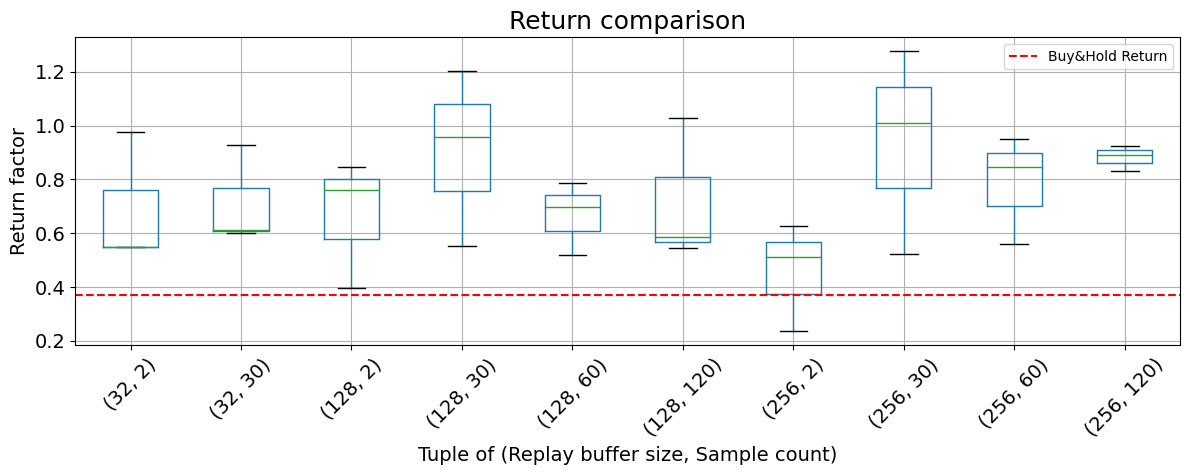

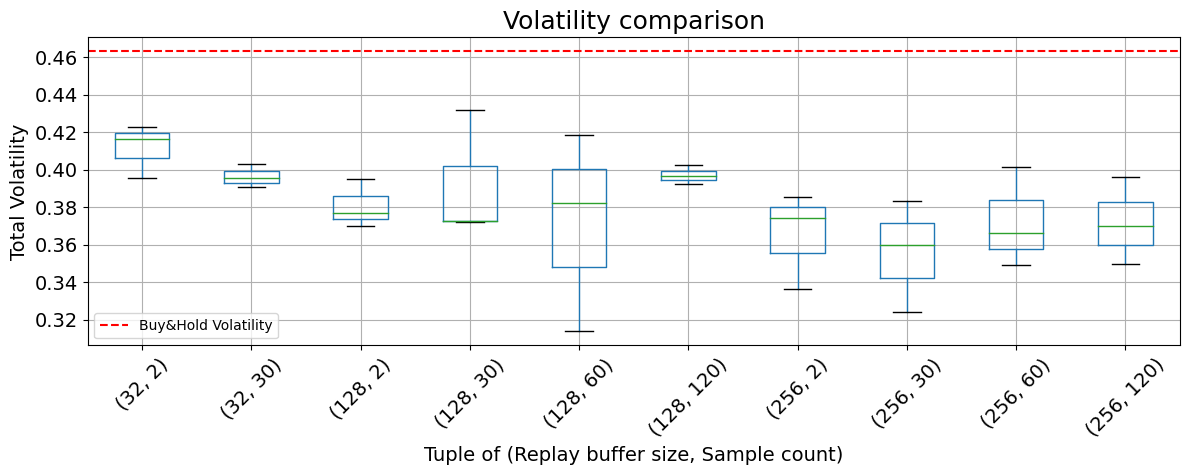

In [7]:
"""Make box plots and lines"""
metrics = metrics[metrics['mode'] == 'Train']


fig, ax = plt.subplots(figsize=(12, 5))
metrics.sort_values(by=['buffer_size', 'sample_size'])
metrics.boxplot(column=['return'], by=['buffer_size', 'sample_size'], ax=ax)
ax.axhline(y=ref_bh['return'][0], color='red', linestyle='dashed', label='Buy&Hold Return')
plt.legend()
plt.suptitle('')
plt.title('Return comparison', fontsize=18)
plt.xlabel('Tuple of (Replay buffer size, Sample count)', fontsize=14)
plt.ylabel('Return factor', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(GRAPH_OUTPUT.joinpath("ret_buf_sam_optimization.png"))
plt.show()

plt.close()

fig, ax = plt.subplots(figsize=(12, 5))
metrics.boxplot(column=['total_volatility'], by=['buffer_size', 'sample_size'], ax=ax)
ax.axhline(y=ref_bh['total_volatility'][0], color='red', linestyle='dashed', label='Buy&Hold Volatility')
plt.legend()
plt.suptitle('')
plt.title('Volatility comparison', fontsize=18)
plt.xlabel('Tuple of (Replay buffer size, Sample count)', fontsize=14)
plt.ylabel('Total Volatility', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(GRAPH_OUTPUT.joinpath("vol_buf_sam_optimization.png"))
plt.show()
plt.close()
